In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import nltk
import pandas as pd
import numpy as np

In [4]:
pre_result = pd.read_csv('pre_result.csv',skipinitialspace=True)
pre_result.head()

,Unnamed: 0,test_comment,sim,y_true
0,0,ร้านนี้อร่อยจริงๆครับเดอะแกงค์ฟันธงเลยยืนยันพา...,0.000000,0
1,1,ร้านข้าวแกงกะหรี่ญี่ปุ่นอยู่บนชั้น2ของThaniyap...,0.412214,0
2,2,เป็นอีกร้านที่อยากแนะนำให้คนรู้จักได้มาลองจะบอ...,0.207692,1
3,3,นัดเพื่อนมาเจอกันที่ร้านParadaiอยากลองเมนูที่ไ...,0.570423,0
4,4,ร้านโด่งดังด้วยบรรยากาศริมผาแต่บริการ@#$%น้องป...,0.204301,0


In [6]:
pre_result.loc[pre_result['sim'] < 0.5, 'y_est'] = 0
pre_result.loc[pre_result['sim'] >= 0.5, 'y_est'] = 1 

print(pre_result)

y_test = pre_result['y_true']
pred = pre_result['y_est']


      Unnamed: 0                                       test_comment       sim  \
0              0  ร้านนี้อร่อยจริงๆครับเดอะแกงค์ฟันธงเลยยืนยันพา...  0.000000   
1              1  ร้านข้าวแกงกะหรี่ญี่ปุ่นอยู่บนชั้น2ของThaniyap...  0.412214   
2              2  เป็นอีกร้านที่อยากแนะนำให้คนรู้จักได้มาลองจะบอ...  0.207692   
3              3  นัดเพื่อนมาเจอกันที่ร้านParadaiอยากลองเมนูที่ไ...  0.570423   
4              4  ร้านโด่งดังด้วยบรรยากาศริมผาแต่บริการ@#$%น้องป...  0.204301   
...          ...                                                ...       ...   
2414        2414  โอ้กะจู๋สาขาNimcity\n\nบรรยากาศ:\nชอบการตกแต่ง...  0.201439   
2415        2415  จริงๆที่แวะร้านนี้เพราะว่าร้านสวยไม่ได้หวังอะไ...  0.196970   
2416        2416  ด้วยความที่ข้าวบ้านไม่มีอะไรกินก็เลยขับรถเข้าเ...  0.510345   
2417        2417  มากินร้านนี้หลายรอบมาก\nเพิ่งได้รีวิว\nมาที่นี...  0.107143   
2418        2418  ร้านผัดไทยชื่อดังรสชาติผมว่าธรรมดามากๆแล้วราคา...  0.000000   

      y_true  y_est  
0    

In [7]:
y_prob = pre_result['sim']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-8-1c44bf2061eb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-8-1c44bf2061eb>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


[[ 154  472]
 [ 152 1641]]


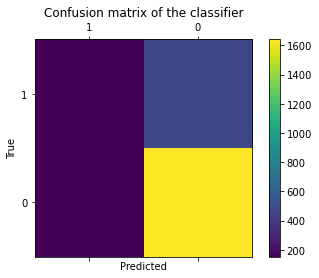

In [8]:
labels = [1, 0]
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[0.         0.00159744 0.00798722 ... 0.95207668 0.95207668 1.        ] 

[0.00000000e+00 5.57724484e-04 5.57724484e-04 ... 8.92359175e-01
 8.92916899e-01 1.00000000e+00] 

[2.         1.         0.93939394 ... 0.03597122 0.0070922  0.        ] 

0.6631410936032744 
 

No Skill: ROC AUC=0.500
LSH: ROC AUC=0.663
Threshold value is: 0.31868131868131866


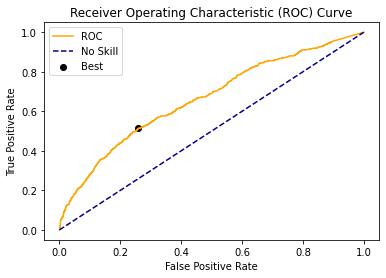

In [11]:
#Use this one
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='No Skill')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# y_true = np.array([0,0, 1, 1,1])
# y_scores = np.array([0.0,0.09, .05, .75,1])

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print(tpr,'\n')
print(fpr,'\n')
print(thresholds,'\n')
print(roc_auc_score(y_test, y_prob),'\n','\n')
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LSH: ROC AUC=%.3f' % (lr_auc))
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)